## GPT2

In [2]:
import pandas as pd
from transformers import pipeline, set_seed

# Configuration pour assurer la reproductibilité lors de la génération de texte
set_seed(123)

data = {
    'business_id': ['123', '123', '456', '456', '456'],
    'text': [
        "Great service but the food was bland.",
        "Loved the ambiance and the dessert, but the main course was too salty.",
        "The waiter was rude.",
        "The steak was fantastic, but the room was too noisy.",
        "Amazing cocktails and friendly staff, but the price is too high."
    ]
}

df = pd.DataFrame(data)


c:\Users\sraps\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Initialiser le modèle GPT-2 
generator = pipeline('text-generation', model='gpt2')
def generate_insights(reviews):
    combined_reviews = " ".join(reviews)
    prompt = (f"Here are some customer reviews on a restaurant deduct the restaurant's asset's.\n\n{combined_reviews}\n\n")
    
    summary = generator(prompt,max_length=250, num_return_sequences=1)
    return summary[0]['generated_text']
# Grouper les avis par 'business_id'
grouped_reviews = df.groupby('business_id')['text'].apply(list)
# Générer des insights pour chaque groupe d'avis
insights_by_business = grouped_reviews.apply(generate_insights)
# Afficher les insights
for business_id, insights in insights_by_business.items():
    print(f"Business ID: {business_id}\nInsights:\n{insights}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Business ID: 123
Insights:
Here are some customer reviews on a restaurant deduct the restaurant's asset's.

Great service but the food was bland. Loved the ambiance and the dessert, but the main course was too salty.


Great menu, great food! The service was good, the seating was good, the food was good, the drink is good, the waiters were friendly, and the staff was nice. We would highly recommend this place to anybody. If you live in the Bay Area they're not so bad either.


Very nice menu, good service but service was very slow. I guess this restaurant is a newbie to the business, and they just want to try and make an honest effort to make the customer happy :) but the waiter and waitress who work in the front office did help a lot when I arrived and didn't take care of things really quickly.


Great experience at a great restaurant in Oakland. I would like to think that the food was fresh and fresh and delicious because that usually means that the service was fine just wait for tim

In [40]:
def generate_insights(reviews):
    combined_reviews = " ".join(reviews[:5])  # Limiter le nombre d'avis
    prompt = (f"Based on the following customer reviews, identify the key strengths and weaknesses of the restaurant:\n\n{combined_reviews}\n\nStrengths:\n- Weaknesses:")
    
    summary = generator(prompt, max_length=250, num_return_sequences=1)
    return summary[0]['generated_text']

# Grouper les avis par 'business_id'
grouped_reviews = df.groupby('business_id')['text'].apply(list)

# Générer des insights pour chaque groupe d'avis
insights_by_business = grouped_reviews.apply(generate_insights)

# Afficher les insights
for business_id, insights in insights_by_business.items():
    print(f"Business ID: {business_id}\nInsights:\n{insights}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Business ID: 123
Insights:
Based on the following customer reviews, identify the key strengths and weaknesses of the restaurant:

Great service but the food was bland. Loved the ambiance and the dessert, but the main course was too salty.

Strengths:
- Weaknesses:

- We don't like to go out to our own place and then get our hands dirty on our food until we can't enjoy ourselves again.

- No side-tasting

- Slow serving method

Frequent customer feedback and suggestions to improve the menu for all of the customers.

All reviews are written in Korean language and are considered to be representative of the Korean-language company's work.

Read More

Business ID: 456
Insights:
Based on the following customer reviews, identify the key strengths and weaknesses of the restaurant:

The waiter was rude. The steak was fantastic, but the room was too noisy. Amazing cocktails and friendly staff, but the price is too high.

Strengths:
- Weaknesses:

- The staff of C-I-N-O are really nice - a little

## Dialo GPT

In [37]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-large")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-large")

# Initialiser la pipeline de génération de texte
dialogue_generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

def generate_dialogue_insights(reviews):
    combined_reviews = " ".join(reviews[:5])  
    prompt = (
        f"Customer Reviews: {combined_reviews}\n"
        f"AI: Based on these reviews, the key weaknesses of the restaurant are :"
    )

    # Générer une réponse basée sur les avis
    generated_response = dialogue_generator(prompt, max_length=200, num_return_sequences=1)
    return generated_response[0]['generated_text']


tokenizer_config.json: 100%|██████████| 26.0/26.0 [00:00<00:00, 13.0kB/s]
c:\Users\sraps\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sraps\.cache\huggingface\hub\models--microsoft--DialoGPT-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
config.json

In [38]:

# Grouper les avis par 'business_id' et générer des insights
grouped_reviews = df.groupby('business_id')['text'].apply(list)
insights_by_business = grouped_reviews.apply(generate_dialogue_insights)

# Affichage des insights
for business_id, insights in insights_by_business.items():
    print(f"Business ID: {business_id}\nInsights:\n{insights}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Business ID: 123
Insights:
Customer Reviews: Great service but the food was bland. Loved the ambiance and the dessert, but the main course was too salty.
AI: Based on these reviews, the key weaknesses of the restaurant are : 1. Saltiness 2. Saltiness 3. Saltiness 4. Saltiness 5. Saltiness 6. Saltiness 7. Saltiness 8. Saltiness 9. Saltiness

Business ID: 456
Insights:
Customer Reviews: The waiter was rude. The steak was fantastic, but the room was too noisy. Amazing cocktails and friendly staff, but the price is too high.
AI: Based on these reviews, the key weaknesses of the restaurant are : 1. The food is not great 2. The service is not great



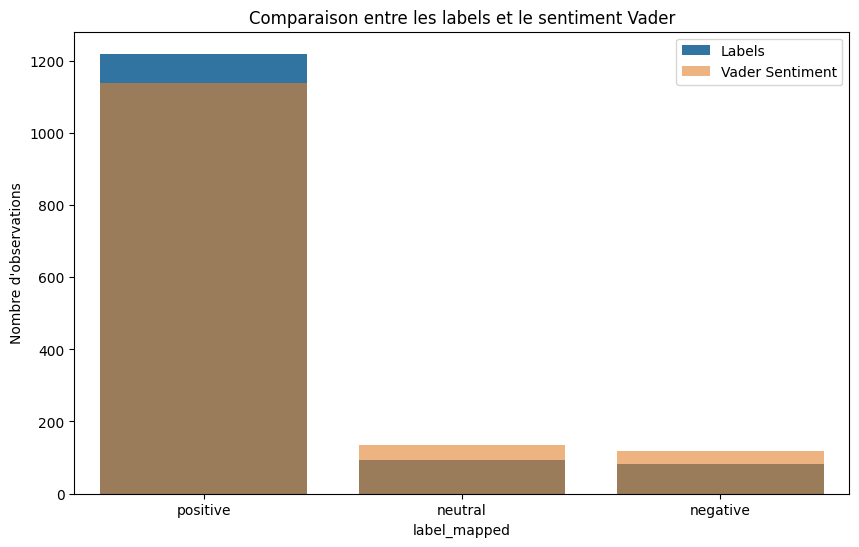

In [68]:
if 'label' in review_df.columns and 'sentiment_vader' in review_df.columns:
    # Créer un dictionnaire pour mapper les labels numériques aux étiquettes de sentiment
    label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    review_df['label_mapped'] = review_df['label'].map(label_map)

    # Préparer les données pour la visualisation
    label_counts = review_df['label_mapped'].value_counts()
    vader_counts = review_df['sentiment_vader'].value_counts()

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, label='Labels')
    sns.barplot(x=vader_counts.index, y=vader_counts.values, label='Vader Sentiment', alpha=0.6)
    plt.title("Comparaison entre les labels et le sentiment Vader")
    plt.ylabel("Nombre d'observations")
    plt.legend()
    plt.show()
else:
    print("Les colonnes nécessaires ne sont pas présentes dans le DataFrame.")

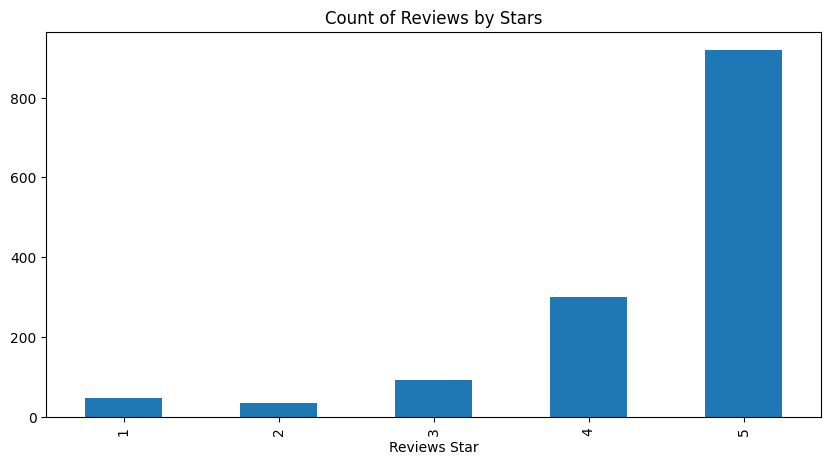

In [62]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,sentiment_vader,sentiment_tokenizer,preprocessed_text,Topic_Title,label
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",positive,positive,base menu present write glow review classiques...,Food with Reservation,2
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...,positive,positive,place feel little bit tourist trap people din ...,Recommended about Food & Service,2
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you...",positive,positive,love french onion soup try comptoir la gastron...,Food with Reservation,2
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, his mo...","Came here with my daughter, son inlaw his mom...",positive,negative,daughter son inlaw mom gratin delicious table ...,French Food,2
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,positive,positive,tiny eatery along seine leave bank best gratin...,Restaurant for Dinner,2


In [58]:
review_df[review_df['label']==2].shape

(1220, 13)

,text,corrected_text,translated_text
0,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...","Based on the menu presented, one could write a..."
1,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...
2,"If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you..."
3,"Came here with my daughter, son inlaw his mom...","Came here with my daughter, son in law, his mo...","Came here with my daughter, son inlaw his mom..."
4,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...
5,"The food was AMAZING, I had the vegetarian veg...","The food was AMAZING, I had the vegetarian veg...","The food was AMAZING, I had the vegetarian veg..."
6,I'm staying in the area and was sitting at a c...,I'm staying in the area and was sitting at a c...,I'm staying in the area and was sitting at a c...
7,I can't help but share my incredible experienc...,I can't help but share my incredible experienc...,I can't help but share my incredible experienc...
8,This is an amazing bar style restaurant. The s...,This is an amazing bar style restaurant. The s...,This is an amazing bar style restaurant. The s...
9,"I understand that everyone wants to see food, ...","I understand that everyone wants to see food, ...","I understand that everyone wants to see food, ..."
